In [10]:
import pandas as pd
import numpy as np

In [11]:
from datetime import datetime
#a = datetime.strptime('30/03/09 16:31:32.123', '%d/%m/%y %H:%M:%S.%f')
a = datetime.strptime('16:31:32.123', '%H:%M:%S.%f')
a.microsecond
#123000

123000

In [12]:
import os
myfolder = '/home/andrewcgaitskell/Downloads/audio/'
contents = os.listdir(myfolder)
contents

['2021-08-05T10:03:48.843198+00:00_2021-08-05T10:04:28.660698+00:00.bytes',
 '2021-08-05T10:04:28.661016+00:00_2021-08-05T10:05:08.497828+00:00.bytes']

y = []
for x in contents:
    #print(x[11:19])
    start_time = x[11:26]
    start_milli = datetime.strptime(start_time, '%H:%M:%S.%f').microsecond
    end_time = x[44:59]
    end_milli = datetime.strptime(end_time, '%H:%M:%S.%f').microsecond
    recording_time = end_milli - start_milli
    #y.append(start_time)
    y.append([start_milli,end_milli,recording_time])
y.sort()
print(y)

times_df = pd.DataFrame(data=y, columns=['start','end','elapse'])
times_df

In [13]:
myfolder = '/home/andrewcgaitskell/Downloads/audio/'
#myfile = '2021-07-27T14:45:35.015312+00:00.bytes'
myfile = '2021-08-05T10:04:28.661016+00:00_2021-08-05T10:05:08.497828+00:00.bytes'
myfullfile = myfolder + myfile
bytes_df = pd.DataFrame()
bytes_list = []
with open(myfullfile, "rb") as f:
    while (byte_val := f.read(2)):
        # Do stuff with byte.
        ##print(byte)
        int_val = int.from_bytes(byte_val, "big")
        bytes_list.append(int_val)
        # printing int equivalent
        #print(int_val)
bytes_df = pd.DataFrame(bytes_list, columns = ['Value'])
bytes_df['Value'].max()
# max = 27666
# min = 24800
# range = 2866

3624

In [14]:
with open(myfullfile, "rb") as f:
    x = 0
    data = [[0,0]]
    while (byte := f.read(2)):
        # Do stuff with byte.
        intbyt = int.from_bytes(byte, 'big') - 24800
        ##print(intbyt)
        x = x + 1
        appendthis = [x,intbyt]
        #print(appendthis)
        try:
            data.append(appendthis)
        except:
            a = 1
        #print(appendthis)
#print(data)
data_df = pd.DataFrame(data=data, columns=['x','y'])
data_df['y'].max()      

0

<AxesSubplot:xlabel='x'>

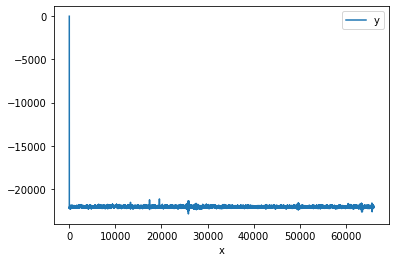

In [15]:
data_df.plot.line(x='x', y='y')  

In [16]:
with open(myfullfile, "rb") as f:
    mybytes = f.read()

In [17]:
mybytes

b'\t\xff\n\x7f\t\xff\nN\nF\nl\nX\t\xf2\t\xff\t\xff\t\xff\nS\nY\n\x8c\n\x9f\nx\t\xff\t\xff\nL\nc\nf\ny\n~\n\x9f\nX\t\xff\nj\ne\n?\nO\t\xff\n`\t\xf8\t\xff\t\xff\nR\t\xff\t\xff\n\x8c\t\xff\t\xea\nY\nX\nb\nQ\t\xff\nd\t\xff\n\x98\t\xff\t\xff\nR\t\xff\t\xff\t\xff\n`\t\xef\na\nP\nX\t\xff\n\x89\n\x98\t\xff\t\xff\n>\n\x89\nT\t\xff\t\xff\n`\np\t\xec\t\xff\na\nb\nO\nD\n\x99\n\xaa\n\x8f\n\xce\n`\nK\n\x87\t\xff\nd\nX\np\nL\np\n\xc0\n\xa9\n`\n\x8c\n\xa4\n\xc0\ni\t\xff\n\x7f\no\nR\n\x9f\nl\t\xff\n`\nh\t\xff\nC\nl\n\x9f\nt\no\n\xc0\n\x8c\n\xb1\t\xff\n\xc3\n\x8c\n\xa3\n\x92\n\x7f\nd\n\xa3\nt\n\xb0\n\xc0\n`\nL\nd\n\xa4\n\xa4\n\xa9\n\x9c\n\x9f\ng\n\xc0\nf\n\x9c\n~\n\x94\n\xc0\n\x93\n\x8f\nC\x0b\x00\n\xa3\n\xcf\no\nd\n\x8a\n\x8e\n\x7f\nl\n\xc9\n`\n\x7f\nD\t\xff\n\x8d\n\x9f\n\xc0\n\x8e\n\xcc\x0b\x00\n\xc0\n\xc4\n\xc0\n\xae\n|\nd\n\x8f\n\x93\n\x7f\n\xc0\n\x89\t\xff\t\xd2\t\xef\t\xff\t\xff\nx\t\xff\t\xff\nG\t\xe6\t\xff\t\xfa\t\xff\t\x91\t\xf1\t\x80\t\xf0\t\xb1\t\xff\t\xe1\t\xf0\t\xff\t\xc0\t\xff\t\xe6\t\xcf\

import wave, struct, math, random
myfolder = '/home/andrewcgaitskell/Downloads/audio/'
#myfile = '2021-07-27T14:45:35.015312+00:00.bytes'
myfile = 'myWave.wav'
myfullwavefile = myfolder + myfile
sampleRate = 22000 # 44100.0 # hertz
#duration = 1.0 # seconds
#frequency = 440.0 # hertz
obj = wave.open(myfullwavefile,'w')
obj.setnchannels(1) # mono
obj.setsampwidth(2)
obj.setframerate(sampleRate)
bytelength = len(mybytes)
with open(myfullwavefile, "rb") as f:
    mybytes = f.read(2)
    value = mybytes
    #data = struct.pack('<h', value)
    obj.writeframesraw( value )
obj.close()

In [18]:
#dt = np.dtype(int)
#dt = dt.newbyteorder('>')
#newarray = np.frombuffer(mybytes, dtype=dt) 
##newarray = np.frombuffer(mybytes, dtype=np.uint16, count=-1)
newarray = np.frombuffer(mybytes, dtype='>i2', count=-1)

In [19]:
newarray

array([2559, 2687, 2559, ..., 2677, 2834, 2703], dtype=int16)

In [20]:
import matplotlib.pyplot as plt


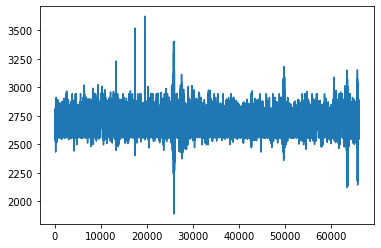

In [21]:
plt.plot(newarray)
plt.show()

import wave

with open(myfullfile, "rb") as inp_f:
    data = inp_f.read()
    with wave.open(myfullwavefile, "wb") as out_f:
        out_f.setnchannels(1)
        out_f.setsampwidth(1) # number of bytes
        out_f.setframerate(22100)
        out_f.writeframesraw(data)

##Check the header of the WAV file:

with wave.open(myfullwavefile, "rb") as in_f:
    print(repr(in_f.getparams()))


In [22]:
len(newarray)/44000

1.501090909090909

In [23]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
DURATION = 1.5
SAMPLE_RATE = 44000
N = len(newarray) ##int(SAMPLE_RATE * DURATION)

yf = fft(newarray)
xf = fftfreq(N, 1 / SAMPLE_RATE)

In [24]:
yf

array([ 1.79965786e+08     -0.j        ,  6.32993080e+04-256284.54238502j,
        1.98375651e+04-160574.9124746j , ...,
       -1.69865299e+05 +20267.07922043j,  1.98375651e+04+160574.9124746j ,
        6.32993080e+04+256284.54238502j])

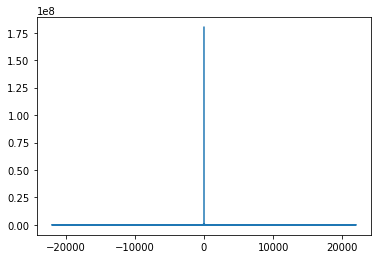

In [25]:
plt.plot(xf, np.abs(yf))
plt.show()

In [26]:
from scipy import fftpack

Text(0, 0.5, 'plower')

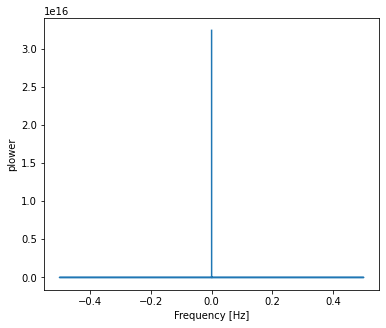

In [27]:
# The FFT of the signal
sig_fft = fftpack.fft(newarray)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

time_step = 1

# The corresponding frequencies
sample_freq = fftpack.fftfreq(newarray.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')



# Check that it does indeed correspond to the frequency that we generate
# the signal with
##np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
##axes = plt.axes([0.55, 0.3, 0.3, 0.5])
##plt.title('Peak frequency')
##plt.plot(freqs[:8], power[:8])
##plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

In [28]:
# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
#print(peak_freq)
print(freqs)

[1.51405039e-05 3.02810078e-05 4.54215116e-05 ... 4.99954578e-01
 4.99969719e-01 4.99984859e-01]


/home/andrewcgaitskell/Documents/Code/env-audio/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


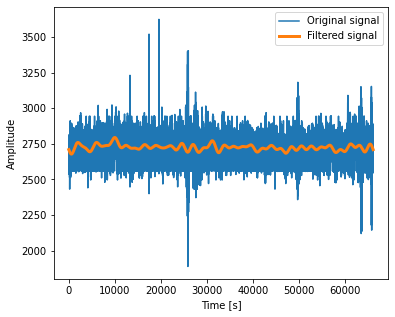

In [29]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

time_vec = np.arange(0, len(newarray), time_step)


plt.figure(figsize=(6, 5))
plt.plot(time_vec, newarray, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

In [30]:
signal = np.array([-2, 8, 6, 4, 1, 0, 3, 5], dtype=float)
fourier = np.fft.fft(signal)
n = signal.size
timestep = .1
freq = np.fft.fftfreq(n, d=timestep)
freq

array([ 0.  ,  1.25,  2.5 ,  3.75, -5.  , -3.75, -2.5 , -1.25])

In [31]:
import scipy as sp
import scipy.fftpack

In [32]:
temp_fft = sp.fftpack.fft(newarray)

In [33]:
temp_psd = np.abs(temp_fft) ** 2

In [34]:
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / 44000)

In [35]:
i = fftfreq > 0

Text(0, 0.5, 'PSD (dB)')

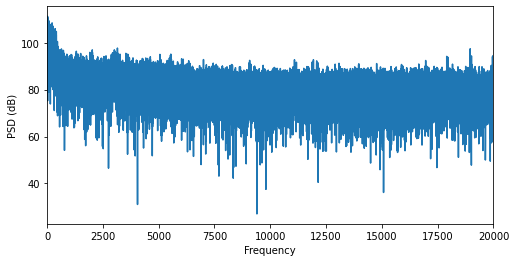

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
ax.set_xlim(0, 20000)
ax.set_xlabel('Frequency')
ax.set_ylabel('PSD (dB)')

In [37]:
temp_fft_bis = temp_fft.copy()
temp_fft_bis

array([ 1.79965786e+08     -0.j        ,  6.32993080e+04-256284.54238502j,
        1.98375651e+04-160574.9124746j , ...,
       -1.69865299e+05 +20267.07922043j,  1.98375651e+04+160574.9124746j ,
        6.32993080e+04+256284.54238502j])

In [38]:
np.shape(fftfreq)

(66048,)

In [39]:
##mask = np.logical_and(an_array < 3, an_array == 4)
temp_fft_bis[np.abs(fftfreq) < 25] = 0
#temp_fft_bis[np.abs(fftfreq) > 20000] = 0

In [40]:
np.shape(temp_fft_bis)

(66048,)

In [41]:
temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
temp.plot(ax=ax, lw=.5)
ax.plot_date(date, temp_slow, '-')
ax.set_xlim(datetime.date(1994, 1, 1),
            datetime.date(2000, 1, 1))
ax.set_ylim(-10, 40)
ax.set_xlabel('Date')
ax.set_ylabel('Mean temperature')

Text(0, 0.5, 'Amplitude')

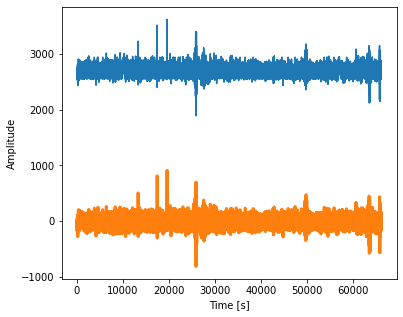

In [42]:
time_vec = np.arange(0, len(temp_slow), time_step)


plt.figure(figsize=(6, 5))
plt.plot(time_vec, newarray, label='Original signal')
plt.plot(time_vec, temp_slow, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')